In [2]:
import tensorflow as tf 
import os as o
import matplotlib.pyplot as plt
import numpy as np

In [3]:
o.listdir("../W4A2/Human_Emosion_Dataset")

['test', 'train']

In [4]:
train_dir = '../W4A2/Human_Emosion_Dataset/train'
test_dir = '../W4A2/Human_Emosion_Dataset/test'


In [5]:
train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.0,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip =True
)
train_data

In [6]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0)

In [7]:
train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(150, 150),  
    batch_size=32, 
    class_mode='categorical' 
)


Found 231 images belonging to 3 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,  
    class_mode='categorical'
)

Found 183 images belonging to 3 classes.


In [9]:
# import tensorflow as tf
# import numpy as np

# # Function to convert generator to numpy arrays
# def generator_to_array(generator):
#     # Initialize lists to hold images and labels
#     images, labels = [], []
    
#     # Iterate through the batches
#     for i in range(len(generator)):
#         image_batch, label_batch = next(generator)
#         images.append(image_batch)
#         labels.append(label_batch)
    
#     # Convert lists to numpy arrays
#     images = np.vstack(images)
#     labels = np.vstack(labels)
    
#     return images, labels

# # Reset the generators to start from the beginning
# train_generator.reset()
# test_generator.reset()

# # Convert the generators to numpy arrays
# train_x_orig, train_y = generator_to_array(train_generator)
# test_x_orig, test_y = generator_to_array(test_generator)

# # Flatten the images
# train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
# test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# # Standardize the flattened images
# train_x = train_x_flatten / 255.0
# test_x = test_x_flatten / 255.0

# # Print the shapes
# print("train_x's shape: " + str(train_x.shape))
# print("test_x's shape: " + str(test_x.shape))


In [10]:
import numpy as np

def extract_data(generator):
    images, labels = [], []
    for _ in range(len(generator)):
        image_batch, label_batch = next(generator)
        images.append(image_batch)
        labels.append(label_batch)
    images = np.concatenate(images)
    labels = np.concatenate(labels)
    return images, labels

# Reset generators to start from the beginning
train_generator.reset()
test_generator.reset()

# Extract images and labels
train_x_orig, train_y = extract_data(train_generator)
test_x_orig, test_y = extract_data(test_generator)

# Flatten the images
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

# Ensure train_y and test_y are shaped correctly
train_y = train_y.reshape(1, -1)
test_y = test_y.reshape(1, -1)

print("train_x's shape: " + str(train_x.shape))  # Should be (67500, 6719)
print("train_y's shape: " + str(train_y.shape))  # Should be (1, 6719)
print("test_x's shape: " + str(test_x.shape))    # Should be (67500, 2259)
print("test_y's shape: " + str(test_y.shape))

train_x's shape: (67500, 231)
train_y's shape: (1, 693)
test_x's shape: (67500, 183)
test_y's shape: (1, 549)


In [11]:
train_y = train_y.reshape(1, -1)[:, :train_x.shape[1]]
test_y = test_y.reshape(1, -1)[:, :test_x.shape[1]]

In [12]:
# 67500,6719

n_x = 67500     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075


In [13]:

from dnn_app_utils_v3 import *


def twoLayModel(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    for i in range(0, num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        cost = compute_cost(A2, Y)
        dA2 = -(np.divide(Y, A2)-np.divide(1-Y, 1-A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        parameters = update_parameters(parameters, grads, learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("cost after iteration {}:{}".format(i,np.squeeze(cost)))
        if i%100==0 or i==num_iterations:
            costs.append(cost)

    return parameters,costs

def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

cost after iteration 14:0.6902995102053113
Cost after first iteration: 0.6931441732201832


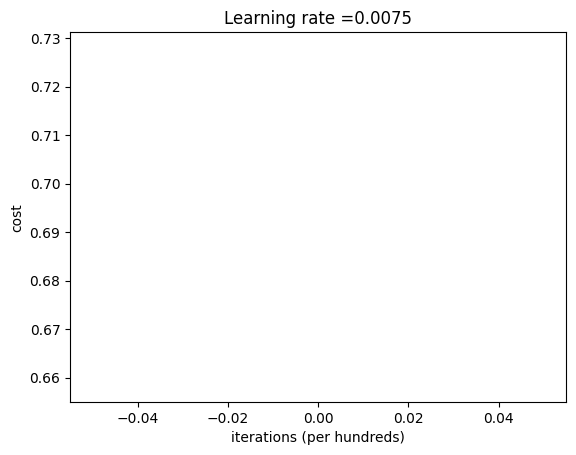

In [50]:
parameters, costs = twoLayModel(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 15, print_cost=False)
# train_x's shape: (67500, 6719)
# train_y's shape: (1, 20157)
# test_x's shape: (67500, 2259)
# test_y's shape: (1, 6777)
print("Cost after first iteration: " + str(costs[0]))
plot_costs(costs, learning_rate=0.0075)

In [51]:
print(parameters)

{'W1': array([[ 0.01624366, -0.00611736, -0.00528151, ..., -0.0098376 ,
         0.00777624, -0.00359907],
       [ 0.00674595,  0.01952421, -0.00013207, ...,  0.00195571,
         0.02276515,  0.00218508],
       [ 0.02342984, -0.00645546,  0.00128051, ..., -0.00873251,
        -0.01423346,  0.0156023 ],
       ...,
       [-0.00606639, -0.02731711, -0.00296756, ..., -0.00558124,
         0.00512345,  0.00313085],
       [-0.00347646,  0.02041674,  0.00273959, ..., -0.002861  ,
        -0.00262114, -0.00604831],
       [-0.01095442,  0.00594467,  0.01247631, ...,  0.00049077,
         0.00171174,  0.00773652]]), 'b1': array([[ 1.23355256e-04],
       [ 6.86348233e-05],
       [ 8.47483014e-06],
       [ 7.25850757e-06],
       [-1.21772735e-04],
       [ 0.00000000e+00],
       [ 4.70095870e-06]]), 'W2': array([[-0.00646555, -0.00380246, -0.00052254, -0.00997969,  0.00651921,
        -0.01506832,  0.0063707 ]]), 'b2': array([[-0.01850534]])}


In [20]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.6666666666666667


In [ ]:
def predict1(X, parameters):
    A1, cache1 = linear_activation_forward(X, parameters['W1'], parameters['b1'], 'relu')
    A2, cache2 = linear_activation_forward(A1, parameters['W2'], parameters['b2'], 'sigmoid')
    predictions = A2 > 0.5  # Convert probabilities to binary predictions
    return predictions


(231, 150, 150, 3)
(224, 224, 3)


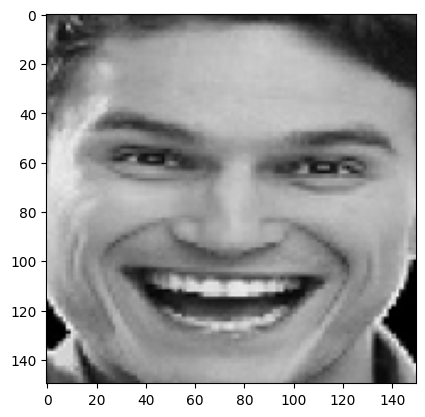

Accuracy: 0.0
y = 0.0, your L-layer model predicts a "not happy" picture.


In [83]:
from PIL import Image
my_image = "hap.jpg"  # Change this to the name of your image file
my_label_y = [1]
num_px = train_x_orig.shape[1]

print(train_x_orig.shape)
# Load, resize, and normalize the image
fname = "images/" + my_image
ii = np.array(Image.open(fname))
print(ii.shape)
image = np.array(Image.open(fname).resize((num_px, num_px)))

plt.imshow(image)
plt.show()

image = image / 255.  # Normalize image
image = image.reshape((1, num_px * num_px*3)).T  # Flatten and reshape

# Assuming 'parameters' is already defined and trained
my_predicted_image = predict(image, my_label_y, parameters)

# Print the prediction
print("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" +
      ("happy" if np.squeeze(my_predicted_image) == 1 else "not happy") + "\" picture.")

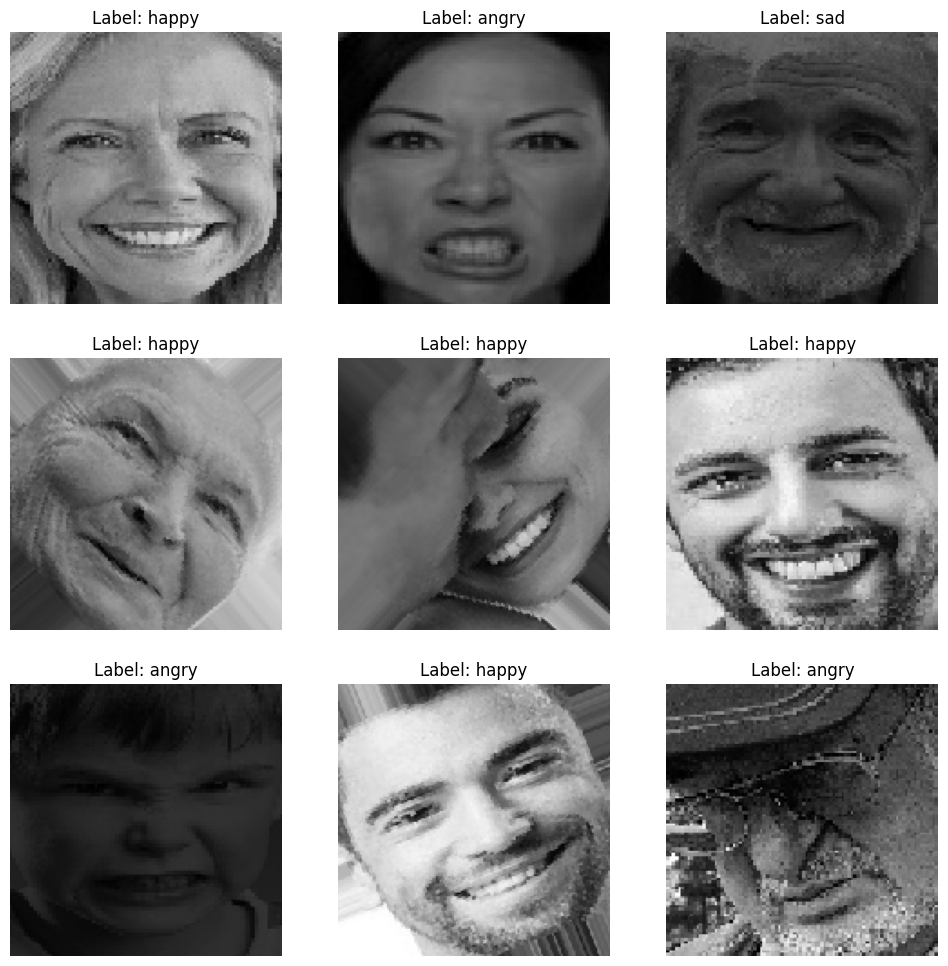

In [15]:
images, labels = next(test_generator)
class_indices = test_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title('Label: ' + index_to_class[np.argmax(labels[i])])
    plt.axis('off')
plt.show()

In [16]:
train_X = train_generator